In [230]:
import numpy as np
import pandas as pd
import warnings
from tqdm import tqdm
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

tqdm.pandas()
warnings.filterwarnings("ignore")

In [231]:
data = pd.read_csv("./max_data/max_dataset.csv")
data = data.fillna("Nil")
data.replace("0", "Nil", inplace=True)
data.replace("Nil", 0, inplace=True)
data.replace("Negative", 0, inplace=True)
data.replace("Normal", 0, inplace=True)
data.replace("Absent", 0, inplace=True)
data.replace("Yes", True, inplace=True)
data.replace("No", False, inplace=True)
data.replace("yes", True, inplace=True)
data.replace("no", False, inplace=True)
data.replace("True", True, inplace=True)
data.replace("False", False, inplace=True)
data = data.select_dtypes(include=[int, float, bool, object])
data = data.drop(columns=[data.columns[0], data.columns[1]])
data["PDOB.dob"] = data["PDOB.dob"].apply(lambda x: int(x.split("-")[-1]))
data

,PDOB.dob,PGDR.gender,PCHC.chiefcomplains,DAAA.doyouhaveanyallergies?,DAAD.drugallergies,DAAF.fooditemallergies,DAAS.skinallergies,DAAR.respiratoryallergies,DAAO.anyotherallergies,"HLSO.doyoucurrentlysmokeanytobaccoproductsdaily,suchascigarettes,cigarsorpipes?",...,LSTP.trophozoite,LAUB.uibc,LBRU.urea,LBRA.uricacid,LUSF.urinesugarfasting,LUSP.urinesugarpp,LUUB.urobilinogen,LABT.vitaminb12,LBLV.vldlcholesterol,LEEK.whitebloodcell
0,1963,Male,0,True,0,0,Due to summer,0,0,False,...,0,0.0,12.4,5.0,0,0,0,0,15.2,1-2
1,1975,Female,0,False,0,0,0,0,0,False,...,0,0.0,0,0.0,0,0,0,0,0.0,1-2
2,1969,Male,0,False,0,0,0,0,0,False,...,0,0.0,17.4,6.1,0,0,0,0,19.2,0-1
3,1963,Male,Asthma,True,0,0,0,Dust,0,False,...,0,0.0,28.7,5.0,0,0,0,0,16.0,2-4
4,1974,Male,0,False,0,0,0,0,0,False,...,0,0.0,17.0,7.3,0,0,0,0,56.4,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,1975,Female,0,False,0,0,0,0,0,False,...,0,0.0,21.0,4.2,0,0,0,0,31.4,2-3
2688,1962,Male,0,False,0,0,0,0,0,True,...,0,0.0,22.6,6.3,0,0,0,0,14.4,2-4
2689,1972,Male,0,False,0,0,0,0,0,True,...,0,0.0,31.3,7.6,0,0,0,169,34.4,0-1
2690,1967,Male,0,False,0,0,0,0,0,False,...,0,0.0,24.1,7.5,0,0,0,0,33.2,1-2


In [232]:
df3 = data.loc[:, [col for col in data.columns]]
df3

,PDOB.dob,PGDR.gender,PCHC.chiefcomplains,DAAA.doyouhaveanyallergies?,DAAD.drugallergies,DAAF.fooditemallergies,DAAS.skinallergies,DAAR.respiratoryallergies,DAAO.anyotherallergies,"HLSO.doyoucurrentlysmokeanytobaccoproductsdaily,suchascigarettes,cigarsorpipes?",...,LSTP.trophozoite,LAUB.uibc,LBRU.urea,LBRA.uricacid,LUSF.urinesugarfasting,LUSP.urinesugarpp,LUUB.urobilinogen,LABT.vitaminb12,LBLV.vldlcholesterol,LEEK.whitebloodcell
0,1963,Male,0,True,0,0,Due to summer,0,0,False,...,0,0.0,12.4,5.0,0,0,0,0,15.2,1-2
1,1975,Female,0,False,0,0,0,0,0,False,...,0,0.0,0,0.0,0,0,0,0,0.0,1-2
2,1969,Male,0,False,0,0,0,0,0,False,...,0,0.0,17.4,6.1,0,0,0,0,19.2,0-1
3,1963,Male,Asthma,True,0,0,0,Dust,0,False,...,0,0.0,28.7,5.0,0,0,0,0,16.0,2-4
4,1974,Male,0,False,0,0,0,0,0,False,...,0,0.0,17.0,7.3,0,0,0,0,56.4,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,1975,Female,0,False,0,0,0,0,0,False,...,0,0.0,21.0,4.2,0,0,0,0,31.4,2-3
2688,1962,Male,0,False,0,0,0,0,0,True,...,0,0.0,22.6,6.3,0,0,0,0,14.4,2-4
2689,1972,Male,0,False,0,0,0,0,0,True,...,0,0.0,31.3,7.6,0,0,0,169,34.4,0-1
2690,1967,Male,0,False,0,0,0,0,0,False,...,0,0.0,24.1,7.5,0,0,0,0,33.2,1-2


In [233]:
results9 = pd.read_csv("D:/code/r_public3_twenty_regular/results_9features.csv")
results10 = pd.read_csv("D:/code/r_public3_twenty_regular/results_10features.csv")
results11 = pd.read_csv("D:/code/r_public3_twenty_regular/results_11features.csv")
results12 = pd.read_csv("D:/code/r_public3_twenty_regular/results_12features.csv")
results9.iloc[:100, :100]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.000000,0.666667,0.666667,0.777778,0.555556,0.555556,0.444444,0.555556,0.333333,...,0.444444,0.555556,0.444444,0.444444,0.444444,0.555556,0.333333,0.555556,0.333333,0.555556
1,0.555556,1.000000,0.555556,0.444444,0.555556,0.333333,0.666667,0.666667,0.444444,0.444444,...,0.222222,0.555556,0.444444,0.444444,0.222222,0.333333,0.777778,0.333333,0.555556,0.555556
2,0.555556,0.333333,1.000000,0.555556,0.555556,0.666667,0.555556,0.333333,0.777778,0.777778,...,0.555556,0.333333,0.444444,0.666667,0.666667,0.666667,0.555556,0.555556,0.666667,0.777778
3,0.555556,0.000000,0.444444,1.000000,0.444444,0.333333,0.111111,0.222222,0.333333,0.444444,...,0.333333,0.333333,0.222222,0.222222,0.444444,0.444444,0.222222,0.222222,0.222222,0.444444
4,0.666667,0.222222,0.888889,0.777778,1.000000,0.666667,0.666667,0.333333,0.666667,0.777778,...,0.555556,0.555556,0.444444,0.555556,0.555556,0.666667,0.555556,0.555556,0.888889,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.555556,0.222222,0.666667,0.444444,0.555556,0.333333,0.444444,0.333333,0.444444,0.444444,...,0.555556,0.222222,0.333333,0.555556,0.666667,1.000000,0.333333,0.444444,0.444444,0.333333
96,0.666667,0.111111,0.666667,0.666667,0.777778,0.666667,0.777778,0.555556,0.777778,0.666667,...,0.777778,0.555556,0.666667,0.777778,0.666667,0.777778,1.000000,0.666667,0.777778,0.777778
97,0.222222,0.111111,0.222222,0.444444,0.333333,0.333333,0.222222,0.000000,0.333333,0.222222,...,0.222222,0.333333,0.333333,0.444444,0.222222,0.333333,0.000000,1.000000,0.222222,0.111111
98,0.777778,0.444444,0.666667,0.666667,0.666667,0.555556,0.777778,0.333333,0.555556,0.777778,...,0.666667,0.333333,0.555556,0.777778,0.666667,0.555556,0.555556,0.555556,1.000000,0.555556


In [234]:
def load_aux_series(file_path, num_cols):
    df = pd.read_csv(file_path, header=0)
    aux_series = df.iloc[:, 0].groupby(df.index // num_cols).apply(list)
    return aux_series

aux9 = load_aux_series("D:/code/r_public3_twenty_regular/aux_9features.csv", 9)
aux10 = load_aux_series("D:/code/r_public3_twenty_regular/aux_10features.csv", 10)
aux11 = load_aux_series("D:/code/r_public3_twenty_regular/aux_11features.csv", 11)
aux12 = load_aux_series("D:/code/r_public3_twenty_regular/aux_12features.csv", 12)
aux9

0      [LHCH.mchc, LHCP.neutrophils, IRUO.usgw.abdome...
1      [ENWT.weight(kg), LXHT.hbsagtestvalue, ICEO.ec...
2      [ENHT.height(cm), EGVP.pulse, EGLY.lymphadenop...
3      [LOIM.ck-mb(mass), LBLP.totalprotein, LHCL.abs...
4      [LOIM.ck-mb(mass), LHES.esr(westergren), LBLR....
                             ...                        
96     [LHCS.mpv, LBLH.hdlcholesterol, LHCZ.packedcel...
97     [LHCA.basophils, LUMC.microalbumin/creatininer...
98     [LHCV.mcv, EGLY.lymphadenopathy, LEEK.whiteblo...
99     [LBDI.averageglucosevalueforthelast3monthsifcc...
100    [IRUR.comments/reports, LHCD.eosinophils, LBLV...
Name: 0, Length: 101, dtype: object

In [235]:
numerical_cols = results10.select_dtypes(include=[np.number]).columns
diff = (results10[numerical_cols] - results9[numerical_cols]).abs()
total_diff = diff.sum().sum()
total_diff

498.91111111111104

In [236]:
print(list(results10.iloc[0]))
print(list(results11.iloc[0]))

[1.0, 0.0, 0.6, 0.7, 0.8, 0.5, 0.5, 0.4, 0.6, 0.3, 0.4, 0.6, 0.4, 0.2, 0.4, 0.3, 0.6, 0.3, 0.4, 0.5, 0.3, 0.4, 0.6, 0.4, 0.2, 0.3, 0.3, 0.2, 0.5, 0.4, 0.5, 0.4, 0.6, 0.3, 0.5, 0.2, 0.5, 0.6, 0.4, 0.4, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.6, 0.7, 0.6, 0.6, 0.3, 0.4, 0.6, 0.3, 0.4, 0.6, 0.5, 0.4, 0.5, 0.4, 0.6, 0.5, 0.5, 0.3, 0.3, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.8, 0.5, 0.3, 0.5, 0.5, 0.4, 0.7, 0.6, 0.7, 0.5, 0.6, 0.8, 0.5, 0.5, 0.5, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6, 0.3, 0.5, 0.3, 0.5, 0.5]
[1.0, 0.0, 0.6363636363636364, 0.7272727272727273, 0.8181818181818182, 0.5454545454545454, 0.5454545454545454, 0.3636363636363636, 0.6363636363636364, 0.3636363636363636, 0.4545454545454545, 0.6363636363636364, 0.4545454545454545, 0.2727272727272727, 0.4545454545454545, 0.3636363636363636, 0.6363636363636364, 0.2727272727272727, 0.4545454545454545, 0.5454545454545454, 0.2727272727272727, 0.3636363636363636, 0.6363636363636364, 0.4545454545454545, 0.2727272727272727, 0.2727272727272727, 0.2

In [237]:
results = [results9, results10, results11, results12]
line_values = [[0 for _ in range(1, 6)] for _ in range(4)]

for i in tqdm(range(0, 4)):
    line_values[0][i] = sum(results[i].iloc[j, j] == results[i].iloc[j].max() for j in range(len(results[i])))
    line_values[1][i] = sum(results[i].iloc[j, j] == results[i].iloc[j].max() and sum(results[i].iloc[j, :] > 0.9) == 1 for j in range(len(results[i])))
    line_values[2][i] = sum(results[i].iloc[j, j] == results[i].iloc[j].max() and sum(results[i].iloc[j, :] > 0.8) == 1 for j in range(len(results[i])))
    line_values[3][i] = sum(results[i].iloc[j, j] == results[i].iloc[j].max() and sum(results[i].iloc[j, :] > 0.7) == 1 for j in range(len(results[i])))

line_values = [[(x/len(df3))*100 for x in line_values[i]] for i in range(4)]

100%|██████████| 4/4 [00:00<00:00, 32.73it/s]


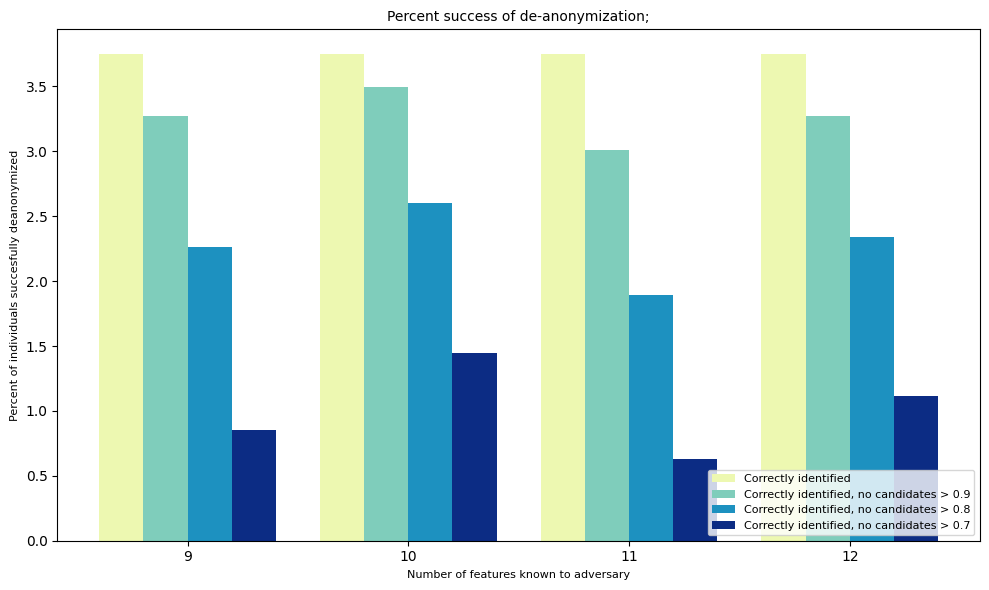

In [238]:
x = np.arange(len(line_values[0])-1)
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width*1.5, line_values[0][:-1], width, label='Correctly identified', color='#edf8b1')
bars2 = ax.bar(x - width*0.5, line_values[1][:-1], width, label='Correctly identified, no candidates > 0.9', color='#7fcdbb')
bars3 = ax.bar(x + width*0.5, line_values[2][:-1], width, label='Correctly identified, no candidates > 0.8', color='#1d91c0')
bars4 = ax.bar(x + width*1.5, line_values[3][:-1], width, label='Correctly identified, no candidates > 0.7', color='#0c2c84')

ax.set_xlabel('Number of features known to adversary', fontsize=8)
ax.set_ylabel('Percent of individuals succesfully deanonymized', fontsize=8)
ax.set_title('Percent success of de-anonymization;', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels([str(9+x) for x in range(0, 4)])
ax.legend(fontsize=8, loc="lower right")

plt.tight_layout()
plt.show()

In [239]:
aux_df = pd.DataFrame({
    "aux9": aux9,
    "aux10": aux10,
    "aux11": aux11,
    "aux12": aux12
})
aux_df

,aux9,aux10,aux11,aux12
0,"[LHCH.mchc, LHCP.neutrophils, IRUO.usgw.abdome...","[LHCH.mchc, LHCP.neutrophils, IRUO.usgw.abdome...","[LHCH.mchc, LHCP.neutrophils, IRUO.usgw.abdome...","[LHCH.mchc, LHCP.neutrophils, IRUO.usgw.abdome..."
1,"[ENWT.weight(kg), LXHT.hbsagtestvalue, ICEO.ec...","[ENWT.weight(kg), LXHT.hbsagtestvalue, ICEO.ec...","[ENWT.weight(kg), LXHT.hbsagtestvalue, ICEO.ec...","[ENWT.weight(kg), LXHT.hbsagtestvalue, ICEO.ec..."
2,"[ENHT.height(cm), EGVP.pulse, EGLY.lymphadenop...","[ENHT.height(cm), EGVP.pulse, EGLY.lymphadenop...","[ENHT.height(cm), EGVP.pulse, EGLY.lymphadenop...","[ENHT.height(cm), EGVP.pulse, EGLY.lymphadenop..."
3,"[LOIM.ck-mb(mass), LBLP.totalprotein, LHCL.abs...","[LOIM.ck-mb(mass), LBLP.totalprotein, LHCL.abs...","[LOIM.ck-mb(mass), LBLP.totalprotein, LHCL.abs...","[LOIM.ck-mb(mass), LBLP.totalprotein, LHCL.abs..."
4,"[LOIM.ck-mb(mass), LHES.esr(westergren), LBLR....","[LOIM.ck-mb(mass), LHES.esr(westergren), LBLR....","[LOIM.ck-mb(mass), LHES.esr(westergren), LBLR....","[LOIM.ck-mb(mass), LHES.esr(westergren), LBLR...."
...,...,...,...,...
96,"[LHCS.mpv, LBLH.hdlcholesterol, LHCZ.packedcel...","[LHCS.mpv, LBLH.hdlcholesterol, LHCZ.packedcel...","[LHCS.mpv, LBLH.hdlcholesterol, LHCZ.packedcel...","[LHCS.mpv, LBLH.hdlcholesterol, LHCZ.packedcel..."
97,"[LHCA.basophils, LUMC.microalbumin/creatininer...","[LHCA.basophils, LUMC.microalbumin/creatininer...","[LHCA.basophils, LUMC.microalbumin/creatininer...","[LHCA.basophils, LUMC.microalbumin/creatininer..."
98,"[LHCV.mcv, EGLY.lymphadenopathy, LEEK.whiteblo...","[LHCV.mcv, EGLY.lymphadenopathy, LEEK.whiteblo...","[LHCV.mcv, EGLY.lymphadenopathy, LEEK.whiteblo...","[LHCV.mcv, EGLY.lymphadenopathy, LEEK.whiteblo..."
99,[LBDI.averageglucosevalueforthelast3monthsifcc...,[LBDI.averageglucosevalueforthelast3monthsifcc...,[LBDI.averageglucosevalueforthelast3monthsifcc...,[LBDI.averageglucosevalueforthelast3monthsifcc...


In [240]:
print(aux_df.loc[0, "aux9"][8], aux_df.loc[0, "aux10"][8], aux_df.loc[0, "aux11"][8], aux_df.loc[0, "aux12"][8])

LHCW.rdw LHCW.rdw LHCW.rdw LHCW.rdw


In [243]:
print(results9.iloc[0, 9], ",", results10.iloc[0, 9])
print(aux_df.loc[0, "aux9"])
print(aux_df.loc[0, "aux10"])

0.3333333333333333 , 0.3
['LHCH.mchc', 'LHCP.neutrophils', 'IRUO.usgw.abdomen', 'LOIK.creatinekinase(cpk)', 'LUSG.specificgravity', 'LBLE.sgot-aspartatetransaminase(ast)', 'LHCO.monocytes', 'LHES.esr(westergren)', 'LHCW.rdw']
['LHCH.mchc', 'LHCP.neutrophils', 'IRUO.usgw.abdomen', 'LOIK.creatinekinase(cpk)', 'LUSG.specificgravity', 'LBLE.sgot-aspartatetransaminase(ast)', 'LHCO.monocytes', 'LHES.esr(westergren)', 'LHCW.rdw', 'LOIL.ldh']


In [244]:
print(sum(list(results10.iloc[0] - results9.iloc[0])))
print(sum(list(results11.iloc[0] - results10.iloc[0])))
print(sum(list(results12.iloc[0] - results11.iloc[0])))

-2.633333333333333
2.6636363636363605
-3.8636363636363593


In [246]:
# truncate every value to two decimal points
results9 = results9.applymap(lambda x: round(x * 9, 2))
results10 = results10.applymap(lambda x: round(x * 10, 2))
results9

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,9.0,0.0,6.0,6.0,7.0,5.0,5.0,4.0,5.0,3.0,...,5.0,4.0,4.0,4.0,5.0,3.0,5.0,3.0,5.0,5.0
1,5.0,9.0,5.0,4.0,5.0,3.0,6.0,6.0,4.0,4.0,...,5.0,4.0,4.0,2.0,3.0,7.0,3.0,5.0,5.0,5.0
2,5.0,3.0,9.0,5.0,5.0,6.0,5.0,3.0,7.0,7.0,...,3.0,4.0,6.0,6.0,6.0,5.0,5.0,6.0,7.0,2.0
3,5.0,0.0,4.0,9.0,4.0,3.0,1.0,2.0,3.0,4.0,...,3.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,4.0,2.0
4,6.0,2.0,8.0,7.0,9.0,6.0,6.0,3.0,6.0,7.0,...,5.0,4.0,5.0,5.0,6.0,5.0,5.0,8.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6.0,1.0,6.0,6.0,7.0,6.0,7.0,5.0,7.0,6.0,...,5.0,6.0,7.0,6.0,7.0,9.0,6.0,7.0,7.0,6.0
97,2.0,1.0,2.0,4.0,3.0,3.0,2.0,0.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,0.0,9.0,2.0,1.0,2.0
98,7.0,4.0,6.0,6.0,6.0,5.0,7.0,3.0,5.0,7.0,...,3.0,5.0,7.0,6.0,5.0,5.0,5.0,9.0,5.0,3.0
99,3.0,0.0,4.0,2.0,3.0,3.0,3.0,2.0,3.0,4.0,...,4.0,2.0,4.0,3.0,3.0,3.0,3.0,4.0,9.0,3.0


In [247]:
results11 = results11.applymap(lambda x: round(x * 11, 2))
results12 = results12.applymap(lambda x: round(x * 12, 2))

In [253]:
((results11 - results10) < 1).sum().sum()

5274

In [254]:
((results10 - results9) < 1).sum().sum()

5247

In [255]:
((results12 - results11) < 1).sum().sum()

6224

In [256]:
results_public3_twenty_regular = ["" for _ in range(18)]
for i in tqdm(range(1, 17)):
    results_public3_twenty_regular[i] = pd.read_csv(f"D:/code/r_public3_twenty_regular/results_{i}features.csv")

100%|██████████| 16/16 [00:00<00:00, 364.34it/s]


In [392]:
line_values_public3_twenty_regular = [[0 for _ in range(1, 18)] for _ in range(4)]

for i in tqdm(range(1, 17)):
    
    df = results_public3_twenty_regular[i]
    
    line_values_public3_twenty_regular[0][i] = sum(df.iloc[j, j] == df.iloc[j].max() for j in range(len(df)))
    line_values_public3_twenty_regular[1][i] = sum(df.iloc[j, j] == df.iloc[j].max() and (df.iloc[j, :] == 1.0).sum() <= 5 for j in range(len(df)))
    line_values_public3_twenty_regular[2][i] = sum(df.iloc[j, j] == df.iloc[j].max() and (df.iloc[j, :] >= 0.9).sum() <= 5 for j in range(len(df)))
    line_values_public3_twenty_regular[3][i] = sum(df.iloc[j, j] == df.iloc[j].max() and (df.iloc[j, :] == 1.0).sum() == 1 for j in range(len(df)))

line_values_public3_twenty_regular = [[(x/101)*100 for x in line_values_public3_twenty_regular[i]] for i in range(4)]

100%|██████████| 16/16 [00:00<00:00, 34.89it/s]


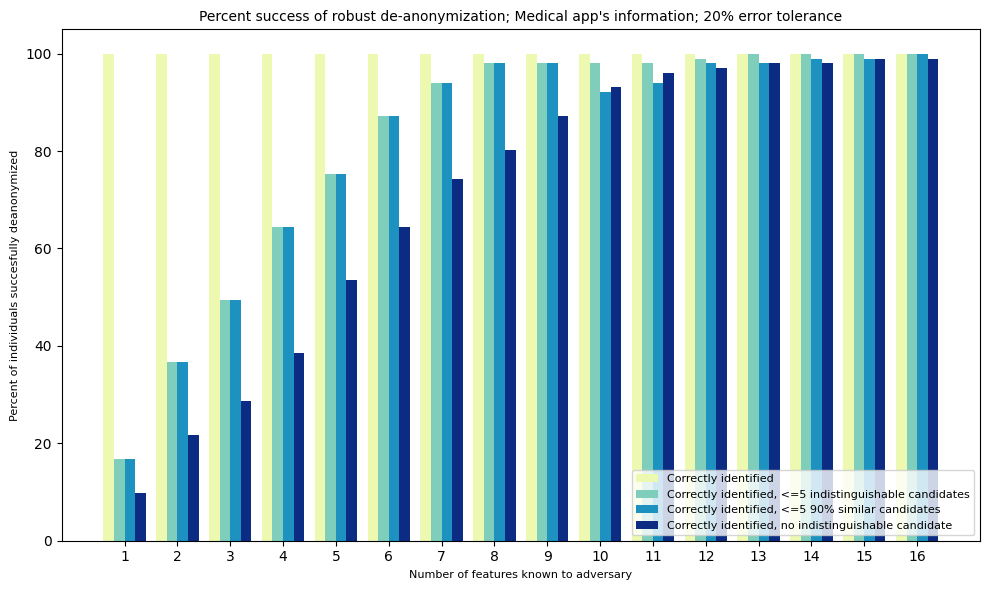

In [395]:
x = np.arange(len(line_values_public3_twenty_regular[0])-1)
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width*1.5, line_values_public3_twenty_regular[0][1:], width, label='Correctly identified', color='#edf8b1')
bars2 = ax.bar(x - width*0.5, line_values_public3_twenty_regular[1][1:], width, label='Correctly identified, <=5 indistinguishable candidates', color='#7fcdbb')
bars3 = ax.bar(x + width*0.5, line_values_public3_twenty_regular[2][1:], width, label='Correctly identified, <=5 90% similar candidates', color='#1d91c0')
bars4 = ax.bar(x + width*1.5, line_values_public3_twenty_regular[3][1:], width, label='Correctly identified, no indistinguishable candidate', color='#0c2c84')

ax.set_xlabel('Number of features known to adversary', fontsize=8)
ax.set_ylabel('Percent of individuals succesfully deanonymized', fontsize=8)
ax.set_title('Percent success of robust de-anonymization; Medical app\'s information; 20% error tolerance', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels([str(x) for x in range(1, 17)])
ax.legend(fontsize=8, loc="lower right")

plt.tight_layout()
plt.show()